In [29]:
import matplotlib.pyplot as plt
import open3d as o3d
import sys
import numpy as np
from ProjectRoot import change_wd_to_project_root
change_wd_to_project_root()
from data.utils import distinct_colors
from data.load_raw_data import load_real_ply_with_labels_smlm
plt.style.available
plt.style.use('seaborn-v0_8')

search for root_dir and set working directory
Working directory set to: c:\Users\imansaray\OneDrive\Desktop\Career\SuperRes PhD\.repo\SuperRes-Imperial-CNRS\DummyModels\PlantSegNet


In [30]:
# 

# 1. Generating noisy and non-noisy images, to demonstrate what noise is in SMLM

# a) Ed shows Miro results
    i) None trained
    ii) Trained ?
# b) I show PlantSeg results
    i) None trained
    ii) Trained ?

<hr>

# Groundtruth data

In [31]:
points, instance_label, semantic_label = load_real_ply_with_labels_smlm(r"datasets\npcs\val\100_smlm_dataset.ply")


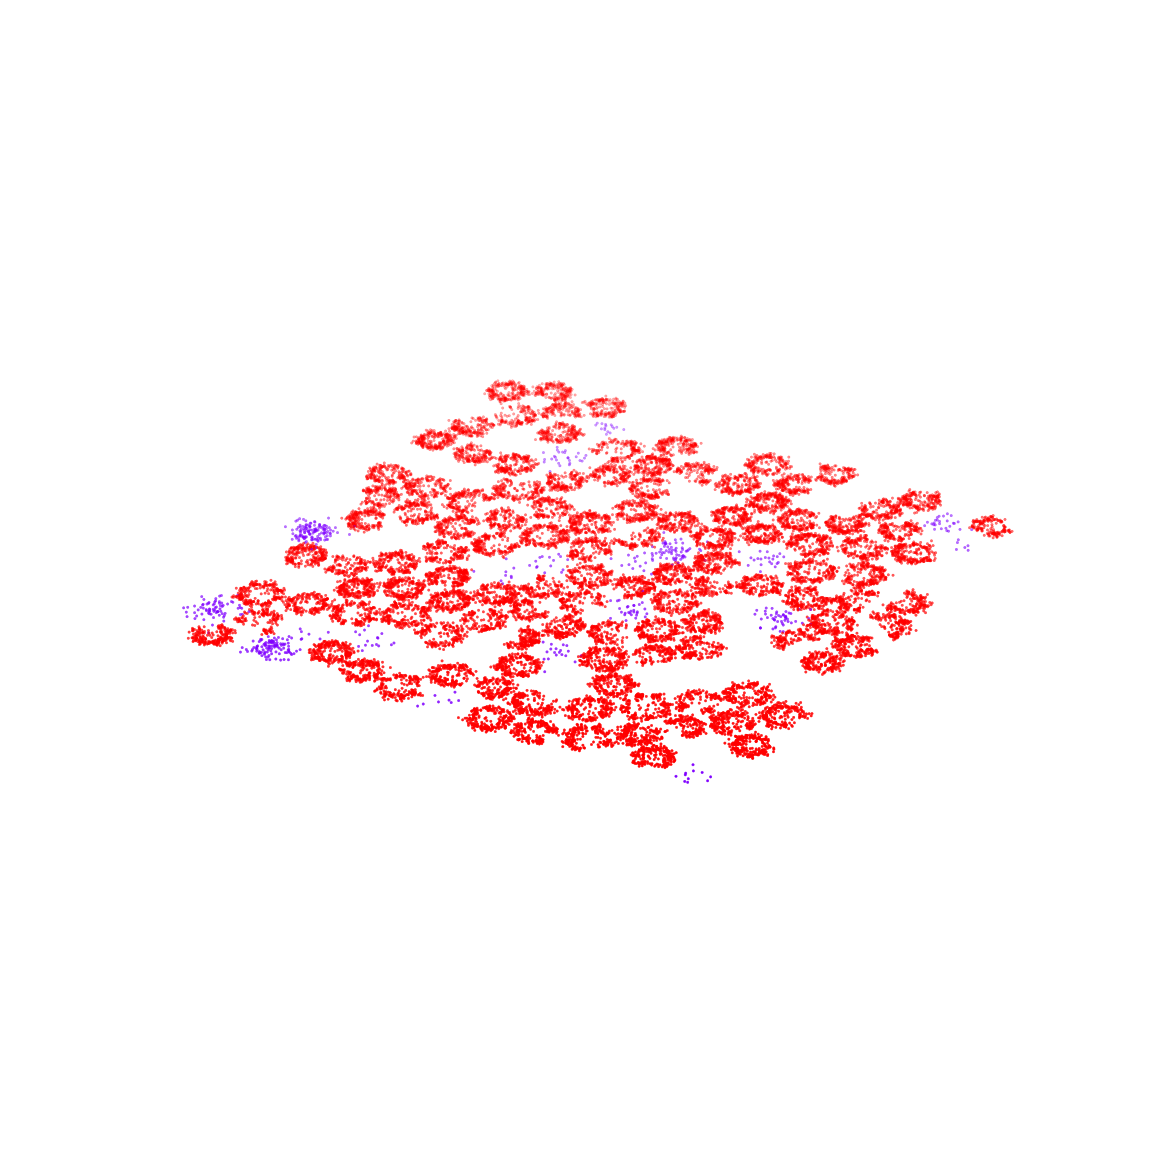

In [32]:
#points, label = ply_file['points_full'], ply_file['labels_full'].squeeze()
from matplotlib.pyplot import cm
d_colors = cm.rainbow(np.linspace(0, 1, np.unique(semantic_label).__len__()))

colors = []
for i, l in enumerate(semantic_label):
    colors.append(d_colors[int(l)])


# Compare dataset to predicition. I have dataset, create predicition tomorrow.
# Create noisy dataset and convert to ply to create dataset.

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')
ax.scatter(points[:,0],points[:,1], s=3, c=colors)
ax.grid(False)
ax.axis("off")
ax.set_facecolor("white")
plt.show()

# fig = plt.figure(figsize=(15,15))
# ax = fig.add_subplot(projection='3d')
# ax.scatter(points[:,0],points[:,1], s=3, c='black')
# ax.grid(False)
# ax.axis("off")
# ax.set_facecolor("white")
# plt.show()

<hr>

# Instance Segmentation Figures

In [33]:
ply_file = load_pcd_plyfile_new_approach("/space/ariyanzarei/sorghum_segmentation/dataset/archive/synthetic/2022-12-26/PointCloud/Season11_38788.ply", True)

NameError: name 'load_pcd_plyfile_new_approach' is not defined

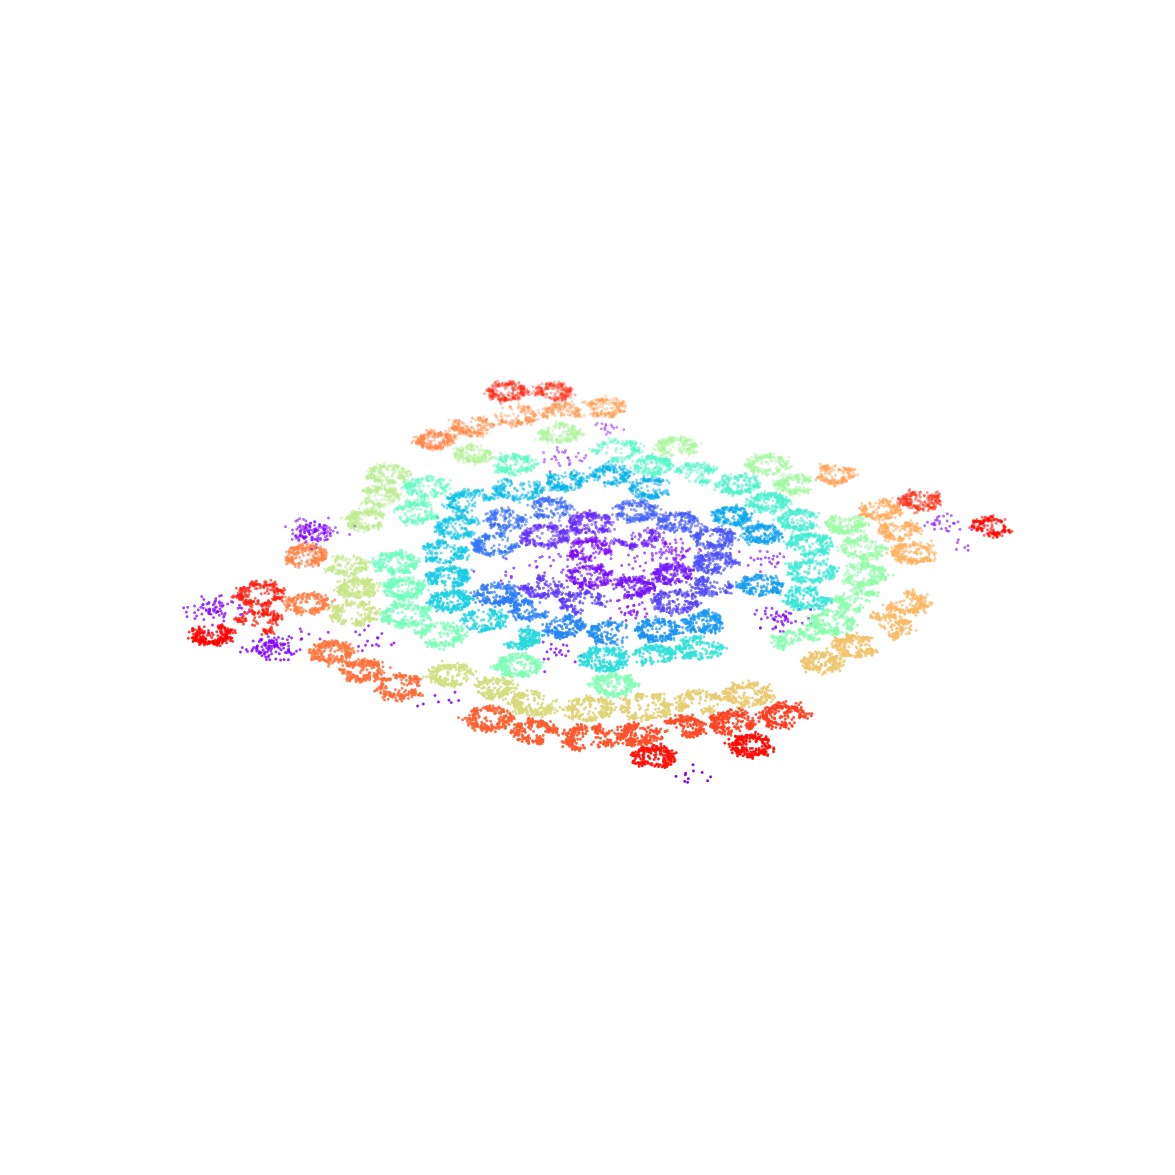

In [ ]:
#points, label = ply_file['points_full'], ply_file['labels_full'].squeeze()
from matplotlib.pyplot import cm
d_colors = cm.rainbow(np.linspace(0, 1, np.unique(instance_label).__len__()))

colors = []
for i, l in enumerate(instance_label):
    colors.append(d_colors[int(l)])


# Compare dataset to predicition. I have dataset, create predicition tomorrow.
# Create noisy dataset and convert to ply to create dataset.

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')
ax.scatter(points[:,0],points[:,1], s=3, c=colors)
ax.grid(False)
ax.axis("off")
ax.set_facecolor("white")
plt.show()

<hr>

# PCA to visualize the embedding space

In [ ]:
from sklearn.decomposition import PCA 
import sys
sys.path.append("..")
from models.nn_models import SorghumPartNetInstance
from data.load_raw_data import load_pcd_plyfile_new_approach
import torch
import numpy as np
import matplotlib.pyplot as plt
from data.utils import distinct_colors
from train_and_inference.test import *

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [ ]:
sorghumpartnet = SorghumPartNetInstance.load_from_checkpoint("/speedy/ariyanzarei/sorghum_segmentation/results/training_logs/SorghumPartNetInstance/SPNS/EXP_08/checkpoints/epoch=8-step=43199.ckpt")
sorghumpartnet = sorghumpartnet.cpu()
sorghumpartnet.DGCNN_feature_space.device = "cpu"

# sorghumpartnet = SorghumPartNetInstance.load_from_checkpoint("/speedy/ariyanzarei/sorghum_segmentation/results/training_logs/SorghumPartNetInstance/SPNS/EXP_09/checkpoints/epoch=8-step=43199.ckpt")
# sorghumpartnet = sorghumpartnet.cpu()
# sorghumpartnet.DGCNN_feature_space.device = "cpu"

In [ ]:
ply_file = load_pcd_plyfile_new_approach("/space/ariyanzarei/sorghum_segmentation/dataset/archive/synthetic/2022-12-26/PointCloud/Season11_38788.ply", True)
points, label = ply_file['points'], ply_file['labels'].squeeze()

In [ ]:
preds = sorghumpartnet(torch.from_numpy(points).type(torch.DoubleTensor).unsqueeze(0).cpu())
preds = preds.squeeze().cpu().detach().numpy()

In [ ]:
k = 200
tensor_points = torch.from_numpy(points).type(torch.DoubleTensor).unsqueeze(0).cpu()
gt_clusters = torch.from_numpy(label).type(torch.FloatTensor).cpu()

num_points = gt_clusters.size(0)
num_dims = 1

distance = torch.cdist(tensor_points, tensor_points)
# idx = torch.topk(distance, k, -1)[1]
# idx = idx.squeeze()

# gt_clusters = gt_clusters.contiguous()

# knn_gt_labels = gt_clusters[idx]
# knn_gt_labels = knn_gt_labels.view(num_points, k)

# std_knn_gt_labels = torch.std(knn_gt_labels, 1)
# std_knn_gt_labels = (std_knn_gt_labels/std_knn_gt_labels.max())*0.8+0.2

distance = (distance.squeeze()<0.15)

count_knn_gt_labels = torch.zeros(num_points)
for i in range(num_points):
    tmp = torch.unique(gt_clusters[distance[i]], return_counts=True)[1]
    count_knn_gt_labels[i] = tmp.shape[0]

In [ ]:
print(count_knn_gt_labels.min(), count_knn_gt_labels.max())
max_count = count_knn_gt_labels.max().int().item()

tensor(1.) tensor(13.)


In [ ]:
# pca_3d = PCA(n_components = 3)
# pca_3d.fit(preds)
# data_pca_3d = pca_3d.transform(preds)

pca_2d = PCA(n_components = 2)
pca_2d.fit(preds)
data_pca_2d = pca_2d.transform(preds)

d_colors = distinct_colors(len(list(set(label))))
colors = np.zeros((label.shape[0],3))
for i, l in enumerate(list(set(label))):
    colors[label == l, :3] = d_colors[i]


pred_labels = get_final_clusters_SPN(preds,)
print(pred_labels.shape)

d_colors = distinct_colors(len(list(set(pred_labels))))
gt_colors = np.zeros((pred_labels.shape[0],3))
for i, l in enumerate(list(set(pred_labels))):
    gt_colors[label == l, :3] = d_colors[i]

    
fig = plt.figure(figsize=(24,24))

# ax1 = fig.add_subplot(3,2,1,projection='3d')
# ax1.scatter(data_pca_3d[:,0],data_pca_3d[:,1],data_pca_3d[:,2], s=5, c=colors)
# ax1.grid(True)
# ax1.set_facecolor("white")

# ax2 = fig.add_subplot(3,2,2,projection='3d')
# for i in range(count_knn_gt_labels.max().int().item()):
#     ind = count_knn_gt_labels==(i+1)
#     ax2.scatter(data_pca_3d[ind,0],data_pca_3d[ind,1],data_pca_3d[ind,2], s=(max_count-i+1)**2, c=colors[ind], marker='o', edgecolors='black', linewidth=0.4, alpha=1)

# ax2.grid(True)
# ax2.set_facecolor("white")

ax3 = fig.add_subplot(1,3,3)
ax3.scatter(data_pca_2d[:,0],data_pca_2d[:,1], s=5, c=colors*1.4)
ax3.grid(True)
ax3.set_facecolor("white")

# ax4 = fig.add_subplot(2,2,2)
# for i in range(count_knn_gt_labels.max().int().item()):
#     ind = count_knn_gt_labels==(i+1)
#     ax4.scatter(data_pca_2d[ind,0],data_pca_2d[ind,1], s=15+(max_count-i+1)**2, c=colors[ind]*1.4, marker='o', edgecolors='black', linewidth=0.4, alpha=1)

# ax4.grid(True)
# ax4.set_facecolor("white")

# ax5 = fig.add_subplot(1,3,2,projection='3d')
# for i in range(max_count):
#     ind = count_knn_gt_labels==(i+1)
#     ax5.scatter(points[ind,0],points[ind,1],points[ind,2], s=(max_count-i+1)**1.5, c=colors[ind], marker='o', edgecolors='black', linewidth=0.4, alpha=0.75**(max_count-i+1))
# ax5.grid(False)
# ax5.axis("off")
# ax5.set_facecolor("white")

ax3 = fig.add_subplot(1,3,1, projection="3d")
ax3.scatter(points[:,0],points[:,1],points[:,2], s=5, c=gt_colors)
ax3.grid(True)
ax3.set_facecolor("white")

ax6 = fig.add_subplot(1,3,2,projection='3d')
ax6.scatter(points[:,0],points[:,1],points[:,2], s=5, c=colors)
ax6.grid(False)
ax6.axis("off")
ax6.set_facecolor("white")
plt.show()

(8000, 256)


TypeError: unhashable type: 'numpy.ndarray'

<hr>

# Printing Numbers for the Tables

In [ ]:
import json

In [ ]:
def load_json(path):
    with open(path, 'r') as f:
        data = json.load(f)
    return data

In [ ]:
full_result_real_08 = load_json("/speedy/ariyanzarei/sorghum_segmentation/results/inference_logs/SorghumPartNetInstance/SPNS/EXP_08/real_data/full_results.json")
for key in full_result_real_08:
    # print(key, np.argmax(full_result_real_08[key]))
    print(key, np.argpartition(full_result_real_08[key], -2)[-2:])

pointwise_accuracies [4 3]
pointwise_precisions [4 3]
pointwise_recalls [4 0]
pointwise_f1s [4 3]
clusterbased_mean_coverages [1 3]
clusterbased_average_precisions [3 1]
clusterbased_average_recalls [3 1]


In [ ]:
#  loss function experiment

result_real_08 = load_json("/speedy/ariyanzarei/sorghum_segmentation/results/inference_logs/SorghumPartNetInstance/SPNS/EXP_08/real_data/mean_results.json")
result_real_09 = load_json("/speedy/ariyanzarei/sorghum_segmentation/results/inference_logs/SorghumPartNetInstance/SPNS/EXP_09/real_data/mean_results.json")
result_synt_08 = load_json("/speedy/ariyanzarei/sorghum_segmentation/results/inference_logs/SorghumPartNetInstance/SPNS/EXP_08/test_set/mean_results.json")
result_synt_09 = load_json("/speedy/ariyanzarei/sorghum_segmentation/results/inference_logs/SorghumPartNetInstance/SPNS/EXP_09/test_set/mean_results.json")

print("real exp_08 ==> ", f"{result_real_08['clusterbased_mean_coverage']:4.2f}&{result_real_08['clusterbased_average_precision']:4.2f}&{result_real_08['clusterbased_average_recall']:4.2f}&{result_real_08['pointwise_accuracy']:4.2f}&{result_real_08['pointwise_precision']:4.2f}&{result_real_08['pointwise_recall']:4.2f}&{result_real_08['pointwise_f1']:4.2f}")
print("real exp_09 ==> ", f"{result_real_09['clusterbased_mean_coverage']:4.2f}&{result_real_09['clusterbased_average_precision']:4.2f}&{result_real_09['clusterbased_average_recall']:4.2f}&{result_real_09['pointwise_accuracy']:4.2f}&{result_real_09['pointwise_precision']:4.2f}&{result_real_09['pointwise_recall']:4.2f}&{result_real_09['pointwise_f1']:4.2f}")

print("synt exp_08 ==> ", f"{result_synt_08['clusterbased_mean_coverage']:4.2f}&{result_synt_08['clusterbased_average_precision']:4.2f}&{result_synt_08['clusterbased_average_recall']:4.2f}&{result_synt_08['pointwise_accuracy']:4.2f}&{result_synt_08['pointwise_precision']:4.2f}&{result_synt_08['pointwise_recall']:4.2f}&{result_synt_08['pointwise_f1']:4.2f}")
print("synt exp_09 ==> ", f"{result_synt_09['clusterbased_mean_coverage']:4.2f}&{result_synt_09['clusterbased_average_precision']:4.2f}&{result_synt_09['clusterbased_average_recall']:4.2f}&{result_synt_09['pointwise_accuracy']:4.2f}&{result_synt_09['pointwise_precision']:4.2f}&{result_synt_09['pointwise_recall']:4.2f}&{result_synt_09['pointwise_f1']:4.2f}")


real exp_08 ==>  0.53&0.69&0.55&0.89&0.50&0.78&0.60
real exp_09 ==>  0.51&0.56&0.53&0.89&0.47&0.72&0.55
synt exp_08 ==>  0.68&0.72&0.70&0.95&0.71&0.92&0.79
synt exp_09 ==>  0.75&0.68&0.79&0.97&0.83&0.89&0.85


In [ ]:
# Sorghum data experiment

result_real_08 = load_json("/speedy/ariyanzarei/sorghum_segmentation/results/inference_logs/SorghumPartNetInstance/SPNS/EXP_08/real_data/mean_results.json")
result_real_04 = load_json("/speedy/ariyanzarei/sorghum_segmentation/results/inference_logs/TreePartNet/SPNS/EXP_04/real_data/mean_results.json")
result_synt_08 = load_json("/speedy/ariyanzarei/sorghum_segmentation/results/inference_logs/SorghumPartNetInstance/SPNS/EXP_08/test_set/mean_results.json")
result_synt_04 = load_json("/speedy/ariyanzarei/sorghum_segmentation/results/inference_logs/TreePartNet/SPNS/EXP_04/test_set/mean_results.json")

print("real exp_08 ==> ", f"{result_real_08['clusterbased_mean_coverage']:4.2f}&{result_real_08['clusterbased_average_precision']:4.2f}&{result_real_08['clusterbased_average_recall']:4.2f}&{result_real_08['pointwise_accuracy']:4.2f}&{result_real_08['pointwise_precision']:4.2f}&{result_real_08['pointwise_recall']:4.2f}&{result_real_08['pointwise_f1']:4.2f}")
print("real exp_04 ==> ", f"{result_real_04['clusterbased_mean_coverage']:4.2f}&{result_real_04['clusterbased_average_precision']:4.2f}&{result_real_04['clusterbased_average_recall']:4.2f}&{result_real_04['pointwise_accuracy']:4.2f}&{result_real_04['pointwise_precision']:4.2f}&{result_real_04['pointwise_recall']:4.2f}&{result_real_04['pointwise_f1']:4.2f}")

print("synt exp_08 ==> ", f"{result_synt_08['clusterbased_mean_coverage']:4.2f}&{result_synt_08['clusterbased_average_precision']:4.2f}&{result_synt_08['clusterbased_average_recall']:4.2f}&{result_synt_08['pointwise_accuracy']:4.2f}&{result_synt_08['pointwise_precision']:4.2f}&{result_synt_08['pointwise_recall']:4.2f}&{result_synt_08['pointwise_f1']:4.2f}")
print("synt exp_04 ==> ", f"{result_synt_04['clusterbased_mean_coverage']:4.2f}&{result_synt_04['clusterbased_average_precision']:4.2f}&{result_synt_04['clusterbased_average_recall']:4.2f}&{result_synt_04['pointwise_accuracy']:4.2f}&{result_synt_04['pointwise_precision']:4.2f}&{result_synt_04['pointwise_recall']:4.2f}&{result_synt_04['pointwise_f1']:4.2f}")

real exp_08 ==>  0.53&0.69&0.55&0.89&0.50&0.78&0.60
real exp_04 ==>  0.17&0.16&0.09&0.65&0.18&0.61&0.27
synt exp_08 ==>  0.68&0.72&0.70&0.95&0.71&0.92&0.79
synt exp_04 ==>  0.30&0.38&0.24&0.79&0.29&0.72&0.41


In [ ]:
result_real_03 = load_json("/speedy/ariyanzarei/sorghum_segmentation/results/inference_logs/SorghumPartNetInstance/TPN/EXP_03/test_set/mean_results.json")
result_real_05 = load_json("/speedy/ariyanzarei/sorghum_segmentation/results/inference_logs/TreePartNet/TPN/EXP_05/test_set/mean_results.json")

for key in result_real_03:
    print(key, f"&{result_real_03[key]:4.2f}&{result_real_05[key]:4.2f}\\\\")

pointwise_accuracy &0.86&0.82\\
pointwise_precision &0.40&0.28\\
pointwise_recall &0.90&0.71\\
pointwise_f1 &0.53&0.39\\
clusterbased_mean_coverage &0.51&0.13\\
clusterbased_average_precision &0.61&0.17\\
clusterbased_average_recall &0.55&0.06\\
